# Face Recognition

In [104]:
from IPython.core.display import display, HTML


display(HTML("<style>.container { width: 80% !important; }</style>"))

In [1]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths

In [2]:
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [3]:
frame = cv2.imread("chloe.png")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

Number of faces detected: 1
[(112, 95) (261, 244)]


In [4]:
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for (x, y) in shape:
          cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

Detection 0: Left: 112 Top: 95 Right: 261 Bottom: 244


In [5]:
cv2.imwrite("out.jpg", frame)

True

In [6]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

I found 1 face(s) in this photograph.
(81, 270, 236, 115)


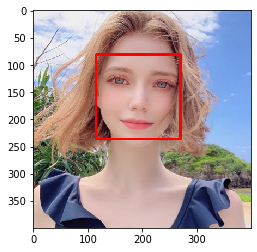

In [8]:
img = cv2.imread("chloe.png")

face_locations = face_recognition.face_locations(img)
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:    
    top, right, bottom, left = face_location
    print(face_location)
    cv2.rectangle(img, (left, top),  (right, bottom), (0, 0, 255), 3)  
imshow("", img) 

In [9]:
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
detector = dlib.get_frontal_face_detector()

In [10]:
frame = cv2.imread('chloe.png')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
rects = detector(gray, 0)  
print("Number of faces detected: {}".format(len(rects)))
for r in rects :
    print(r)

    

Number of faces detected: 1
[(112, 95) (261, 244)]


In [11]:
print(rects[0])
shape = predictor(gray, rects[0])
print(shape)
shape = face_utils.shape_to_np(shape)
print(shape)

[(112, 95) (261, 244)]
[[119 130]
 [119 150]
 [121 170]
 [124 188]
 [131 205]
 [141 221]
 [155 234]
 [170 245]
 [188 250]
 [205 249]
 [221 241]
 [235 230]
 [247 217]
 [256 202]
 [261 185]
 [267 167]
 [271 149]
 [129 113]
 [141 106]
 [156 104]
 [171 106]
 [185 113]
 [216 115]
 [230 112]
 [245 113]
 [259 118]
 [269 126]
 [198 132]
 [197 145]
 [196 159]
 [194 172]
 [180 182]
 [186 184]
 [193 187]
 [199 186]
 [206 185]
 [142 129]
 [153 124]
 [165 126]
 [174 136]
 [163 135]
 [151 134]
 [221 140]
 [232 132]
 [243 134]
 [253 140]
 [243 143]
 [232 142]
 [160 202]
 [173 200]
 [184 198]
 [191 201]
 [199 200]
 [210 204]
 [222 209]
 [208 217]
 [197 219]
 [189 219]
 [182 217]
 [171 213]
 [165 204]
 [183 207]
 [190 208]
 [198 208]
 [217 209]
 [198 209]
 [190 209]
 [183 207]]


Detection 0: Left: 112 Top: 95 Right: 261 Bottom: 244


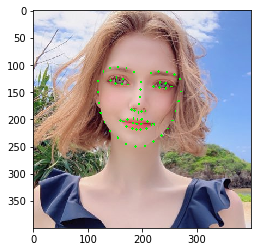

In [12]:
for k, d in enumerate(rects):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
            k, d.left(), d.top(), d.right(), d.bottom()))
        shape = predictor(gray, d)
        shape = face_utils.shape_to_np(shape)
        for s in shape:
          cv2.circle(frame, (s[0], s[1]), 2, (0, 255, 0), -1)
        
imshow('', frame)

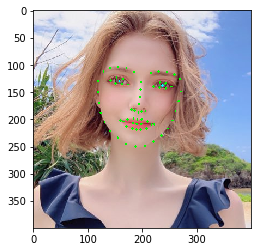

In [15]:
# 36~31

eyel = np.mean(shape[36:42], axis=0)
eyer = np.mean(shape[42:48], axis=0)
cv2.circle(frame, (int(eyel[0]), int(eyel[1])), 2, (255, 255, 0), -1)
cv2.circle(frame, (int(eyer[0]), int(eyer[1])), 2, (255, 255, 0), -1)

imshow("", frame)      

In [17]:
img = face_recognition.load_image_file("chloe.png")
face_encoding = face_recognition.face_encodings(img)
print(face_encoding[0].shape)

(128,)


In [46]:
files = os.listdir("known")   
    
known_face_encodings = []
known_face_names = []

for filename in files:
            name, ext = os.path.splitext(filename)
            if ext == '.png':
                known_face_names.append(name)
                pathname = os.path.join("known", filename)
                img = face_recognition.load_image_file(pathname)
                face_encoding = face_recognition.face_encodings(img)[0] #발견된 얼굴 중 무조건 첫번째
                known_face_encodings.append(face_encoding) 

In [47]:
print(known_face_encodings[1])
print(known_face_names)

[-0.09989877  0.06143666  0.09049411 -0.09261583 -0.11893577 -0.0788513
 -0.10169801 -0.01466939  0.16685706 -0.16007997  0.16435078  0.03174628
 -0.17506096 -0.03415924  0.01033334  0.17697738 -0.19592817 -0.16557504
 -0.05250271 -0.05960858  0.11501203  0.10656814 -0.00206351  0.10807374
 -0.16750692 -0.33997151 -0.06651549 -0.05853318 -0.14293201 -0.1339982
  0.06323919  0.15692683 -0.14662024  0.0220275  -0.03003363  0.12495907
 -0.01234977 -0.06145108  0.20239283  0.04991812 -0.35311663 -0.03620249
  0.09529249  0.26393205  0.2056444  -0.0583992   0.03965133  0.00130785
  0.09693602 -0.34432447  0.01589756  0.19078383  0.06732666  0.08594747
  0.06899747 -0.12395611  0.04799003  0.05009591 -0.1699125  -0.03608194
  0.0369029  -0.21484087  0.02174709 -0.02881799  0.19331895  0.1335644
 -0.09275842 -0.18921126  0.13507044 -0.22117087 -0.18239279  0.19159335
 -0.12233166 -0.18106587 -0.37952402 -0.03613883  0.33765319  0.09704547
 -0.14118133  0.08016327 -0.05071883 -0.06377601  0.01

In [103]:
test = face_recognition.load_image_file("chloe2.png")

face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings:
    
    distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    print(distances)
    min_value = min(distances)
    
    name = "unknown"
    if min_value < 0.6:
        index = np.argmin(distances)
        name = known_face_names[index]
        
print(name)

FileNotFoundError: [Errno 2] No such file or directory: 'chloe2.png'

In [38]:
test = face_recognition.load_image_file("amanda2.png")

face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings:
    
    distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    print(distances)
    min_value = min(distances)
    
    name = "unknown"
    if min_value < 0.6:
        index = np.argmin(distances)
        name = known_face_names[index]
        
print(name)

[0.33546848 0.62612459 0.94970336 1.06045355 0.88655364]
AmandaSeyfried


In [39]:
test = face_recognition.load_image_file("nanami2.png")

face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings:
    
    distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    print(distances)
    min_value = min(distances)
    
    name = "unknown"
    if min_value < 0.6:
        index = np.argmin(distances)
        name = known_face_names[index]
        
print(name)

[0.83801168 0.77065173 0.89788946 0.79024657 0.34523379]
nanami


In [40]:
test = face_recognition.load_image_file("dejong2.png")

face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings:
    
    distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    print(distances)
    min_value = min(distances)
    
    name = "unknown"
    if min_value < 0.6:
        index = np.argmin(distances)
        name = known_face_names[index]
        
print(name)

[0.87800347 0.88830111 0.44871022 0.83759498 0.93757996]
dejong


In [41]:
test = face_recognition.load_image_file("Ferran2.png")

face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings:
    
    distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    print(distances)
    min_value = min(distances)
    
    name = "unknown"
    if min_value < 0.6:
        index = np.argmin(distances)
        name = known_face_names[index]
        
print(name)

[1.04508839 0.97607805 0.76227923 0.51074355 0.83632212]
Ferran


In [48]:
test = face_recognition.load_image_file("lingard2.png")

face_locations = face_recognition.face_locations(test)
face_encodings = face_recognition.face_encodings(test, face_locations)

face_names = []
for face_encoding in face_encodings:
    
    distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    print(distances)
    min_value = min(distances)
    
    name = "unknown"
    if min_value < 0.6:
        index = np.argmin(distances)
        name = known_face_names[index]
        
print(name)

[0.93198948 0.8987333  0.90782385 0.74820862 0.46320969 0.74351646]
lingard


In [87]:
imagePaths = list(paths.list_images("known"))
 
knownEncodings = []
knownNames = []

for (i, imagePath) in enumerate(imagePaths):    
    name = imagePath.split(os.path.sep)[-2]
    print(f"{name}   -   {imagePath}") 
    image = cv2.imread(imagePath)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes) 

    for encoding in encodings:        
        knownEncodings.append(encoding)
        knownNames.append(name)
        
import pickle
data = {"encodings": knownEncodings, "names": knownNames}
f = open("known.bin", "wb")
f.write(pickle.dumps(data))
f.close()

Amanda   -   known\Amanda\amanda2.png
Amanda   -   known\Amanda\amanda3.png
Amanda   -   known\Amanda\amanda4.png
Amanda   -   known\Amanda\amanda5.png
Amanda   -   known\Amanda\AmandaSeyfried.png
Chloe   -   known\Chloe\chloe.png
Chloe   -   known\Chloe\chloe2.png
Chloe   -   known\Chloe\chloe3.png
Chloe   -   known\Chloe\chloe4.png
Chloe   -   known\Chloe\chloe5.png
dejong   -   known\dejong\dejong.png
dejong   -   known\dejong\dejong2.png
dejong   -   known\dejong\dejong3.png
dejong   -   known\dejong\dejong4.png
dejong   -   known\dejong\dejong5.png
dembele   -   known\dembele\dembele.png
dembele   -   known\dembele\dembele2.png
dembele   -   known\dembele\dembele3.png
dembele   -   known\dembele\dembele4.png
dembele   -   known\dembele\dembele5.png
drogba   -   known\drogba\drobga.png
drogba   -   known\drogba\drobga2.png
drogba   -   known\drogba\drobga5.png
drogba   -   known\drogba\drogba3.png
drogba   -   known\drogba\drogba4.png
Ferran   -   known\Ferran\Ferran.png
Ferran   -

In [88]:
print(data["names"][0])
print(data["encodings"][0])

Amanda
[-1.40662938e-01  4.30930480e-02  9.70559120e-02 -6.16020486e-02
 -1.38955027e-01 -1.50997564e-01  4.54470143e-03 -1.18493989e-01
  1.93509698e-01 -9.49738845e-02  7.27349445e-02  2.09633447e-03
 -1.99188888e-01  1.21397234e-03 -3.37853357e-02  1.80300504e-01
 -1.77385956e-01 -1.91680744e-01 -3.87945957e-03 -7.78207704e-02
  1.37600467e-01  8.24761167e-02  1.75966546e-02  1.15149982e-01
 -1.54570118e-01 -2.18747169e-01 -9.35527384e-02 -3.64173353e-02
 -2.20564045e-02 -8.55345726e-02  9.71247256e-02  1.73836946e-01
 -1.89479023e-01 -3.75299267e-02  4.23834771e-02  1.23247594e-01
  5.68737760e-02 -1.39664218e-01  1.60273954e-01  2.94366032e-02
 -3.26082796e-01 -1.16224468e-01  8.89924988e-02  2.88679421e-01
  2.13141114e-01  2.29480751e-02 -1.73793733e-02 -5.94599023e-02
  7.89333209e-02 -3.41993958e-01 -2.78729573e-03  1.59820586e-01
 -4.24051248e-02  6.62716404e-02  5.41570708e-02 -1.90853834e-01
  1.11217424e-01  6.58207685e-02 -2.16948688e-01  4.40793373e-02
  1.05947383e-01 -

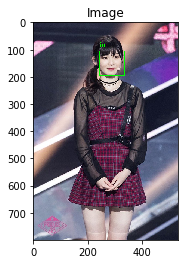

In [89]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("nanami_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) #feature factor list
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:          #모든 data와 비교
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

In [90]:
encoding = encodings[0]
matches = face_recognition.compare_faces(data["encodings"], encoding)
print(matches)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True]


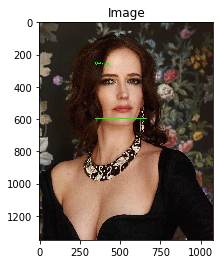

Unknown


In [91]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("eva_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) #feature factor list
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:          #모든 data와 비교
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

print(name)

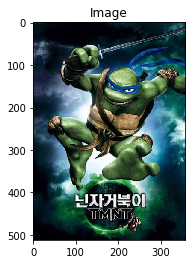

Unknown


In [92]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("ninja_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) #feature factor list
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:          #모든 data와 비교
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

print(name)

In [93]:
feature = np.array(data["encodings"])
print(feature.shape)

(85, 128)


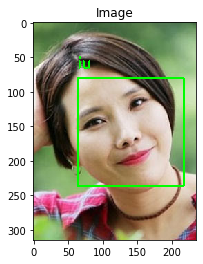

iu


In [94]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("iu_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) #feature factor list
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:          #모든 data와 비교
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

print(name)

In [95]:
import pandas as pd
c = pd.factorize(data["names"])
print(c)
label = c[0]
print(label)

(array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,
        7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10],
      dtype=int64), array(['Amanda', 'Chloe', 'dejong', 'dembele', 'drogba', 'Ferran', 'iu',
       'lily', 'lingard', 'mbappe', 'nanami'], dtype=object))
[ 0  0  0  0  0  1  1  1  1  1  2  2  2  2  2  3  3  3  3  3  4  4  4  4
  4  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  8  8
  8  8  8  9  9  9  9  9 10 10 10 10 10]


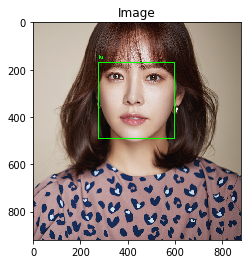

iu


In [96]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("jimin_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) #feature factor list
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:          #모든 data와 비교
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

print(name)

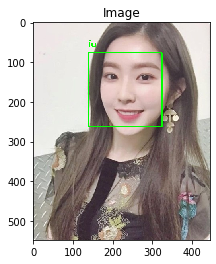

iu


In [97]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("irin_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) #feature factor list
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:          #모든 data와 비교
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

print(name)

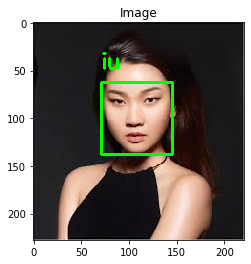

iu


In [98]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("jang_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) #feature factor list
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:          #모든 data와 비교
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

print(name)

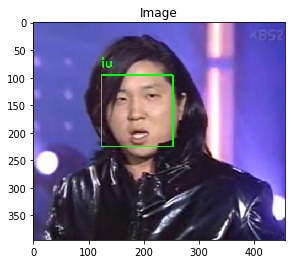

iu


In [99]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("don_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) #feature factor list
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:          #모든 data와 비교
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

print(name)

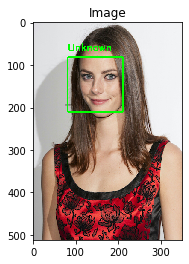

Unknown


In [100]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("kaya_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) #feature factor list
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:          #모든 data와 비교
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

print(name)

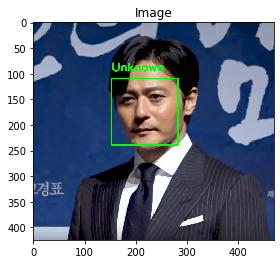

Unknown


In [101]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("dong_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) #feature factor list
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:          #모든 data와 비교
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

print(name)

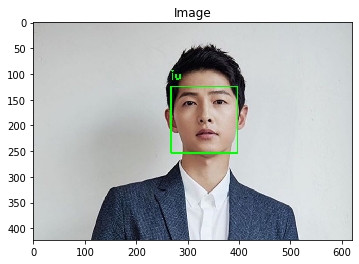

iu


In [102]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("song_test.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding) #feature factor list
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:          #모든 data와 비교
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

print(name)

# age, gender

In [123]:
import cv2 as cv
import math
import time
import argparse

In [124]:
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

In [128]:
input= ""

faceProto = "opencv_face_detector.pbtxt"
faceModel = "opencv_face_detector_uint8.pb"

ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"         # 받아야함
 
genderProto = "gender_deploy.prototxt"
genderModel = "gender_net.caffemodel"  # 받아야함

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

# Open a video file or an image file or a camera stream
cap = cv.VideoCapture("eva_test.jpg")
padding = 20
hasFrame, frame = cap.read()

frameFace, bboxes = getFaceBox(faceNet, frame)

for bbox in bboxes:
    face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

    blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
    genderNet.setInput(blob)
    genderPreds = genderNet.forward()
    gender = genderList[genderPreds[0].argmax()]
        # print("Gender Output : {}".format(genderPreds))
    print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

    ageNet.setInput(blob)
    agePreds = ageNet.forward()
    age = ageList[agePreds[0].argmax()]
    print("Age Output : {}".format(agePreds))
    print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))

    label = "{},{}".format(gender, age)
    cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    
    
cv.imwrite("out.jpg", frameFace)

Gender : Female, conf = 0.998
Age Output : [[0.15139906 0.32137498 0.04665885 0.00597161 0.46204928 0.00732391
  0.00427442 0.00094779]]
Age : (25-32), conf = 0.462


True

In [129]:
input= ""

faceProto = "opencv_face_detector.pbtxt"
faceModel = "opencv_face_detector_uint8.pb"

ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"         # 받아야함
 
genderProto = "gender_deploy.prototxt"
genderModel = "gender_net.caffemodel"  # 받아야함

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

# Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

# Open a video file or an image file or a camera stream
cap = cv.VideoCapture("dong_test.jpg")
padding = 20
hasFrame, frame = cap.read()

frameFace, bboxes = getFaceBox(faceNet, frame)

for bbox in bboxes:
    face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

    blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
    genderNet.setInput(blob)
    genderPreds = genderNet.forward()
    gender = genderList[genderPreds[0].argmax()]
        # print("Gender Output : {}".format(genderPreds))
    print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

    ageNet.setInput(blob)
    agePreds = ageNet.forward()
    age = ageList[agePreds[0].argmax()]
    print("Age Output : {}".format(agePreds))
    print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))

    label = "{},{}".format(gender, age)
    cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    
    
cv.imwrite("out.jpg", frameFace)

Gender : Male, conf = 1.000
Age Output : [[6.6548928e-05 2.4026094e-05 1.1549999e-03 1.4555002e-02 6.0555104e-02
  9.1704410e-01 4.0681805e-03 2.5320454e-03]]
Age : (38-43), conf = 0.917


True